[Reference1](https://medium.com/@ubeydkhoiri/social-network-analysis-in-twitter-using-python-ed8ce624b4ac)<br>
[Reference2](https://medium.com/@ubeydkhoiri/social-network-analysis-in-twitter-using-python-ac90cbd861e5)

In [1]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 4.1 MB/s 


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import re

In [3]:
query = '"Ferdy Sambo" lang:id' #this is the keyword
limit = 10000 #total tweet we wanna crawl
tweets = []
try:
    print('Start crawling')
    for tweet in sntwitter.TwitterSearchScraper(query=query).get_items():
        if len(tweets) == limit:
            break
        else:
            if tweet.inReplyToUser is not None:
                tweet_type = 'reply'
                tweet_reply = re.findall(r'[/]\w+', str(tweet.inReplyToUser))[-1].replace('/','')
            elif tweet.quotedTweet is not None:
                tweet_type = 'retweet'
                tweet_reply = None
            else:
                tweet_type = 'original'
                tweet_reply = None
            tweets.append([tweet.conversationId,
                           tweet.coordinates,
                           tweet.date,
                           tweet.hashtags,
                           tweet.id,
                           tweet.inReplyToTweetId,
                           tweet.inReplyToUser,
                           tweet_reply,
                           tweet.lang,
                           tweet.likeCount,
                           tweet.media,
                           tweet.mentionedUsers,
                           tweet.outlinks,
                           tweet.place,
                           tweet.quoteCount,
                           tweet.quotedTweet,
                           tweet.renderedContent,
                           tweet_type,
                           tweet.replyCount,
                           tweet.retweetCount,
                           tweet.retweetedTweet,
                           tweet.sourceLabel,
                           tweet.url,
                           tweet.user,
                           tweet.user.username])
    df = pd.DataFrame(tweets, columns=(['conversationId',
                                        'coordinates',
                                        'date',
                                        'hashtags',
                                        'id',
                                        'inReplyToTweetId',
                                        'inReplyToUser_url',
                                        'inReplyToUser',
                                        'lang',
                                        'likeCount',
                                        'media',
                                        'mentionedUsers',
                                        'outlinks',
                                        'place',
                                        'quoteCount',
                                        'quotedTweet',
                                        'description',
                                        'tweet_type',
                                        'replyCount',
                                        'retweetCount',
                                        'retweetedTweet',
                                        'source',
                                        'tweet_url',
                                        'user_url',
                                        'username']))
except Exception as e:
    print(e)
    
print('Finished')
print('-----')

Start crawling
Finished
-----


In [4]:
df_reply = df[['inReplyToUser','username']][df['tweet_type'] == 'reply']
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(df_reply.values, axis = 1), columns = ['from','to'])
relationship_df

,from,to
0,Ratnaerayani,ferdysambo227
1,ferdysambo227,tanteamelina
2,endahtriwahyu,ferdysambo227
3,ferdysambo227,jandaintanmelia
4,ferdysambo227,jandawiwin
...,...,...
593,AditMKM,Beckhiyam
594,gggbxng,morgenachtt
595,akanselesai,arrafahrahma
596,peniti_meniti,peniti_meniti


In [5]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["from","to"], sort=False, as_index=False).sum()
relationship_df #see data

,from,to,value
0,Ratnaerayani,ferdysambo227,1
1,ferdysambo227,tanteamelina,1
2,endahtriwahyu,ferdysambo227,1
3,ferdysambo227,jandaintanmelia,2
4,ferdysambo227,jandawiwin,2
...,...,...,...
456,AditMKM,Beckhiyam,1
457,gggbxng,morgenachtt,1
458,akanselesai,arrafahrahma,1
459,peniti_meniti,peniti_meniti,1


In [6]:
relationship_df.to_csv('relation_tweet.csv', index=False)

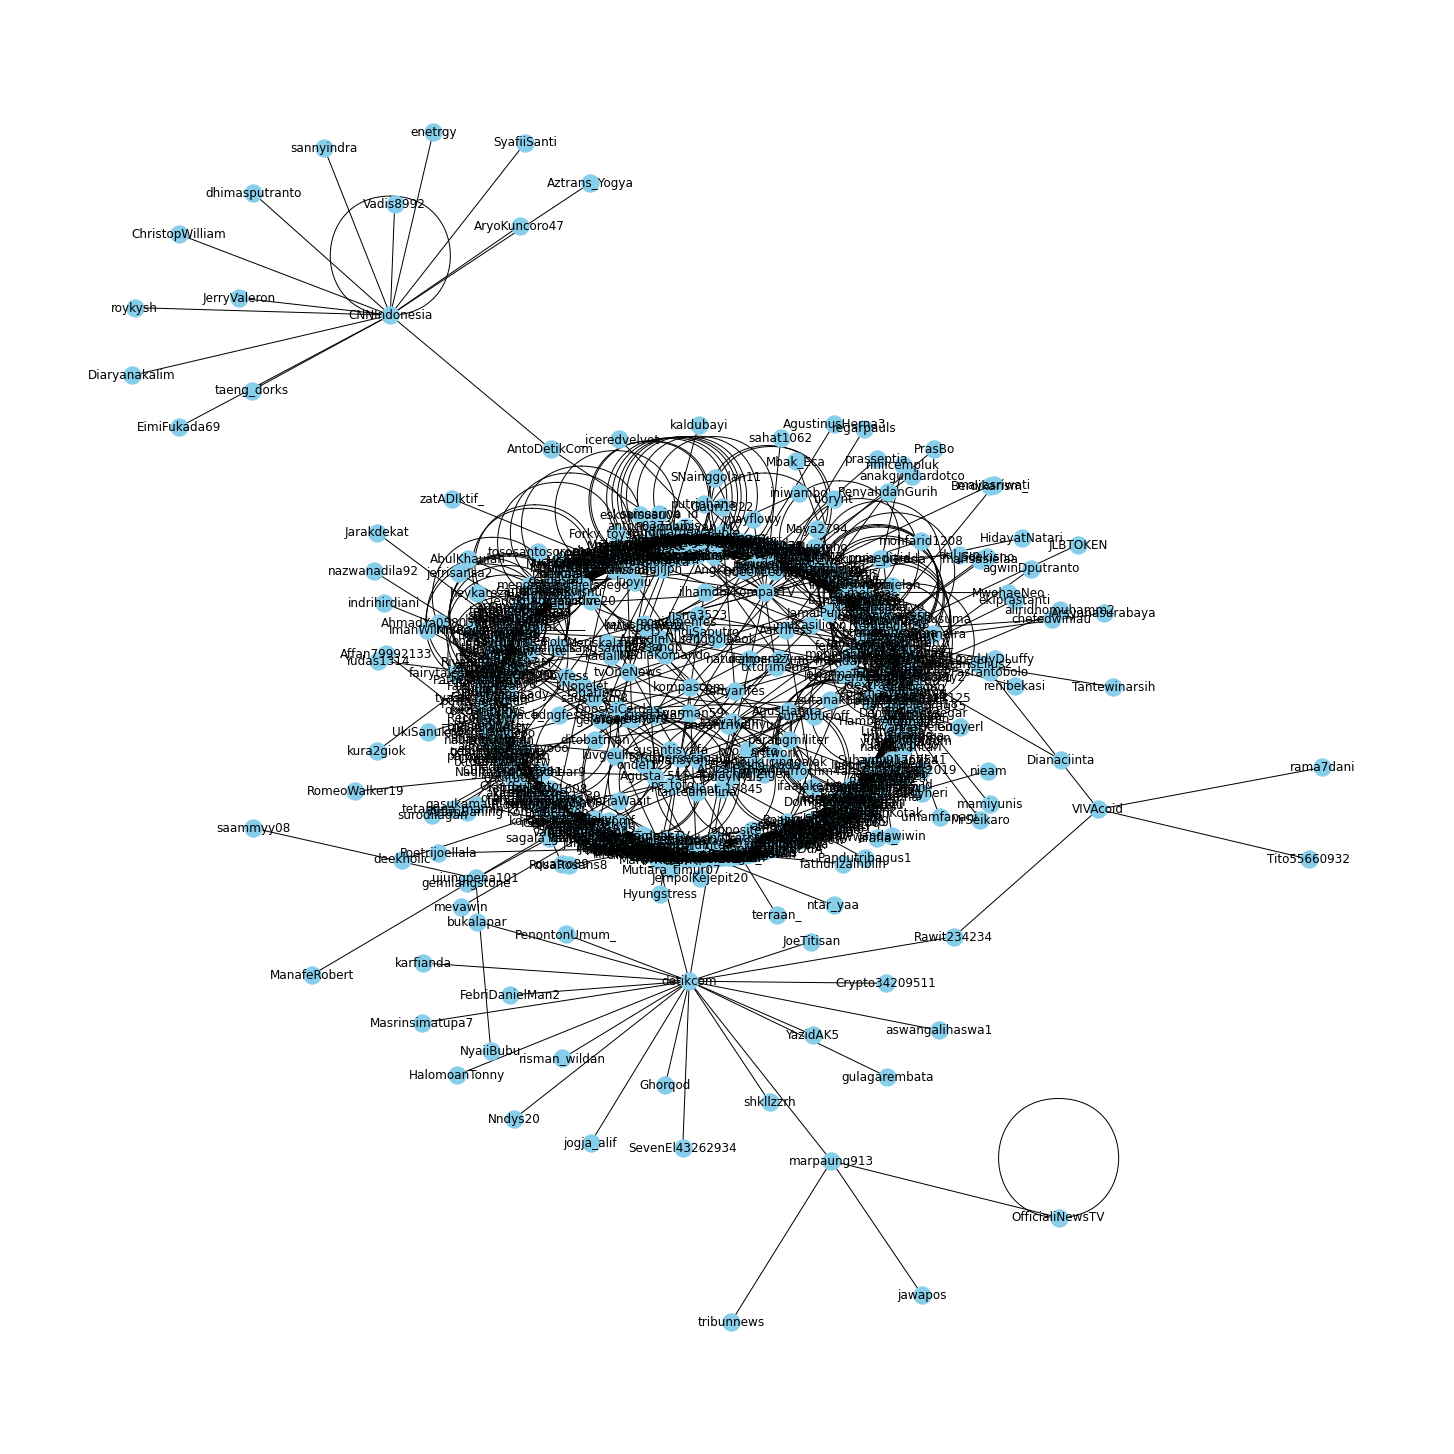

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

relationship_df = pd.read_csv('relation_tweet.csv')

# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "from", 
                            target = "to", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [8]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748 kB 6.4 MB/s 
     |████████████████████████████████| 40 kB 5.5 MB/s 
     |████████████████████████████████| 1.6 MB 16.9 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=bc5202ce6b6f95eb5bebfc37beaad0049e4e6b0c9dac48ff785e6e6e24bb1f95
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
Successfully built pyvis


In [9]:
from pyvis.network import Network
net = Network(notebook=True, width='1000px', height='700px', bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('Sambo.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
